In [1]:
import pyforest

In [3]:
amazon = pd.read_csv(r'amazonreviews.tsv', sep = '\t')

<IPython.core.display.Javascript object>

In [4]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [7]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [8]:
amazon.label.replace({'neg':0, 'pos':1}, inplace= True)

In [9]:
amazon.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [10]:
amazon.review = amazon.review.str.lower()

In [11]:
from nltk.corpus import stopwords
import string

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [12]:
def text_process(mess): ### creating a function
    """ ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords

    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
bow_transformen = CountVectorizer(analyzer=text_process).fit(amazon['review'])

In [15]:
len(bow_transformen.vocabulary_)

40040

In [18]:
amazon_bow = bow_transformen.transform(amazon.review)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(amazon_bow, amazon.label, test_size = 0.2)

In [20]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [21]:
amazon_nb_model = naive_bayes.fit(x_train, y_train)

In [22]:
pred = naive_bayes.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

con_mat=confusion_matrix(pred,y_test)
# This is Direct method
print("This is Confusion Matrix",)
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df=pd.DataFrame({'Naive Bayes':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df

This is Confusion Matrix
[[859 191]
 [143 807]]


<IPython.core.display.Javascript object>

,Naive Bayes
Accuracy,83.30
FPR,14.27
TPR/Recall,80.86
Precision,84.95
F1_score,82.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

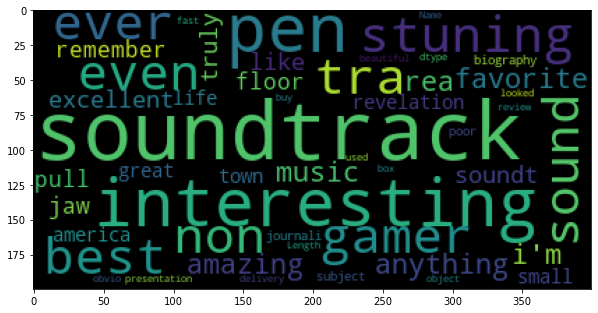

In [25]:
from wordcloud import WordCloud
cloud = WordCloud(stopwords=stopwords.words('english'), max_words = 50).generate(str(amazon['review']))
plt.figure(figsize = (10,10))
plt.imshow(cloud)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

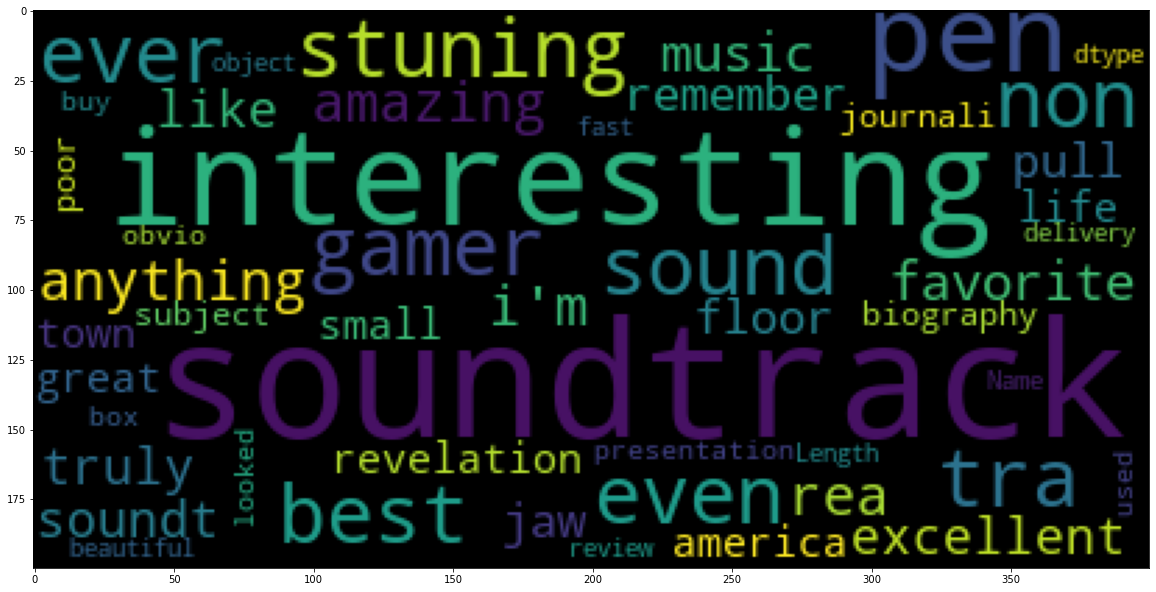

In [29]:
from wordcloud import WordCloud
cloud = WordCloud(stopwords=stopwords.words('english'), max_words = 1000).generate(str(amazon['review']))
plt.figure(figsize = (20,20))
plt.imshow(cloud)